In [1]:
import torch
import pandas as pd
from tqdm.notebook import tqdm


In [2]:
df = pd.read_csv("C:/Users/mufdu/Documents/Deep-Learning/SemEval-Task10/data/shufled_data2.csv")
df.shape

(17350, 5)

In [3]:
df.head(10)

,rewire_id,text,label_sexist,label_category,label_vector
0,sexism2022_english-17004,This also applies to friendships with women.,sexist,2. derogation,2.2 aggressive and emotive attacks
1,sexism2022_english-12868,We all hate your dad...and you too!,not sexist,none,none
2,sexism2022_english-12428,Enoch has mixed loyalties. Jew wife and a negr...,not sexist,none,none
3,sexism2022_english-12446,I've been ruined for many years because of thi...,sexist,2. derogation,2.2 aggressive and emotive attacks
4,sexism2022_english-17844,Thank you Richard and a good morning to you. A...,not sexist,none,none
5,sexism2022_english-7669,That's when you became a female boxer?,not sexist,none,none
6,sexism2022_english-16301,Sorry for the misuse of the word. Of course sh...,not sexist,none,none
7,sexism2022_english-1729,Unreasonable Swedes [URL],not sexist,none,none
8,sexism2022_english-15462,Remember the episode in which the crazy snake ...,not sexist,none,none
9,sexism2022_english-2488,She can backpedal all she wants. I know of MD'...,not sexist,none,none


In [4]:
df['text'] = df['text'].str.replace('[(#@&!?)]','')

C:\Users\mufdu\AppData\Local\Temp\ipykernel_24472\1402786705.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('[(#@&!?)]','')


In [5]:
import contractions

for index, row in df.iterrows():
  row['text'] = contractions.fix(row['text'])
  row['text'] = " ".join(row['text'].split())

In [6]:
df['text'] = df['text'].str.replace(r'[^\w\s]+', '')

df.head(5)

C:\Users\mufdu\AppData\Local\Temp\ipykernel_24472\2779130553.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace(r'[^\w\s]+', '')


,rewire_id,text,label_sexist,label_category,label_vector
0,sexism2022_english-17004,This also applies to friendships with women,sexist,2. derogation,2.2 aggressive and emotive attacks
1,sexism2022_english-12868,We all hate your dadand you too,not sexist,none,none
2,sexism2022_english-12428,Enoch has mixed loyalties Jew wife and a negro...,not sexist,none,none
3,sexism2022_english-12446,I have been ruined for many years because of t...,sexist,2. derogation,2.2 aggressive and emotive attacks
4,sexism2022_english-17844,Thank you Richard and a good morning to you A ...,not sexist,none,none


In [7]:
df["text"] = df["text"].str.replace("URL","")
df["text"] = df["text"].str.replace("USER","")
df["text"] = df["text"].str.lower()
df.head(5)

,rewire_id,text,label_sexist,label_category,label_vector
0,sexism2022_english-17004,this also applies to friendships with women,sexist,2. derogation,2.2 aggressive and emotive attacks
1,sexism2022_english-12868,we all hate your dadand you too,not sexist,none,none
2,sexism2022_english-12428,enoch has mixed loyalties jew wife and a negro...,not sexist,none,none
3,sexism2022_english-12446,i have been ruined for many years because of t...,sexist,2. derogation,2.2 aggressive and emotive attacks
4,sexism2022_english-17844,thank you richard and a good morning to you a ...,not sexist,none,none


In [8]:
df.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))

,rewire_id,text,label_sexist,label_category,label_vector
0,sexism2022_english-17004,this also applies to friendships with women,sexist,2. derogation,2.2 aggressive and emotive attacks
1,sexism2022_english-12868,we all hate your dadand you too,not sexist,none,none
2,sexism2022_english-12428,enoch has mixed loyalties jew wife and a negro...,not sexist,none,none
3,sexism2022_english-12446,i have been ruined for many years because of t...,sexist,2. derogation,2.2 aggressive and emotive attacks
4,sexism2022_english-17844,thank you richard and a good morning to you a ...,not sexist,none,none
...,...,...,...,...,...
17345,sexism2022_english-6478,howzabout if i flip them this way no,not sexist,none,none
17346,sexism2022_english-9798,women always have hidden goals,sexist,2. derogation,2.1 descriptive attacks
17347,sexism2022_english-10721,i am a mgtow bro no one stealing my money i ju...,not sexist,none,none
17348,sexism2022_english-14520,you know what they say people who rape in glas...,not sexist,none,none


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


Text(0.5, 0, 'label')

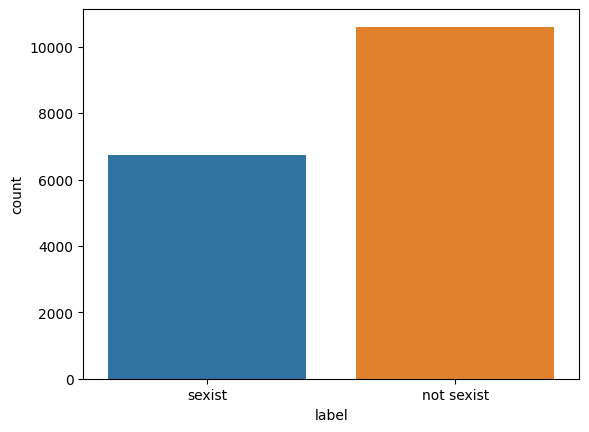

In [10]:
sns.countplot(x = df.label_sexist)
plt.xlabel('label')


In [11]:
# Encoding categorical data to integer labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label_sexist'] = le.fit_transform(df['label_sexist'])
print(df['label_sexist'])

0        1
1        0
2        0
3        1
4        0
        ..
17345    0
17346    1
17347    0
17348    0
17349    0
Name: label_sexist, Length: 17350, dtype: int32


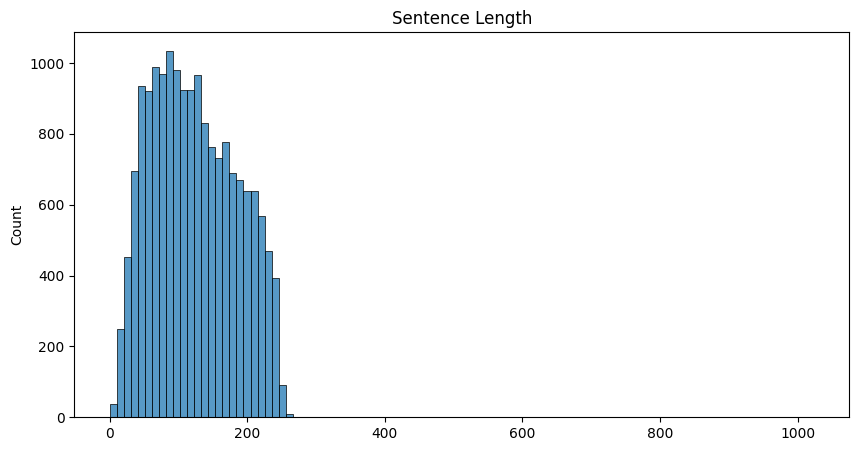

In [12]:
#need equal length sentences
#plot hist of sentence length
plt.figure(figsize=(10, 5))
sns.histplot([len(s) for s in df.text], bins=100)
plt.title('Sentence Length')
plt.show()


In [13]:
#find the maximum length
max_len = max([len(sent) for sent in df.text])
print('Max length: ', max_len)


Max length:  1024


In [14]:
from sklearn.model_selection import train_test_split

#train test split
X_train, X_val, y_train, y_val = train_test_split(df.index.values, 
                                                   df.label_sexist.values,
                                                   test_size = 0.15,
                                                   random_state = 17,
                                                   stratify = df.label_sexist.values)


In [15]:
#create new column
df['data_type'] = ['not_set'] * df.shape[0]
df.head()


,rewire_id,text,label_sexist,label_category,label_vector,data_type
0,sexism2022_english-17004,this also applies to friendships with women,1,2. derogation,2.2 aggressive and emotive attacks,not_set
1,sexism2022_english-12868,we all hate your dadand you too,0,none,none,not_set
2,sexism2022_english-12428,enoch has mixed loyalties jew wife and a negro...,0,none,none,not_set
3,sexism2022_english-12446,i have been ruined for many years because of t...,1,2. derogation,2.2 aggressive and emotive attacks,not_set
4,sexism2022_english-17844,thank you richard and a good morning to you a ...,0,none,none,not_set


In [16]:
#fill in data type
df.loc[X_train, 'data_type'] = 'train'
df.loc[X_val, 'data_type'] = 'val'


In [17]:
df.groupby(['label_sexist', 'data_type']).count()


rewire_id  text  label_category  label_vector
label_sexist data_type                                               
0            train           9011  9011            9011          9011
             val             1591  1591            1591          1591
1            train           5736  5736            5736          5736
             val             1012  1012            1012          1012

TOKENIZATION

In [18]:
from transformers import BertTokenizer
from torch.utils.data import TensorDataset


In [19]:
#load tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased',
                                         do_lower_case = True)


In [20]:
#tokenize train set
encoded_data_train = tokenizer.batch_encode_plus(df[df.data_type == 'train'].text.values,
                                                add_special_tokens = True,
                                                return_attention_mask = True,
                                                pad_to_max_length = True,
                                                max_length = 250,
                                                return_tensors = 'pt')


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
c:\Users\mufdu\anaconda3\envs\pytorch_env\lib\site-packages\transformers\tokenization_utils_base.py:2336: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [21]:
#tokenizer val set
encoded_data_val = tokenizer.batch_encode_plus(df[df.data_type == 'val'].text.values,
                                                #add_special_tokens = True,
                                                return_attention_mask = True,
                                                pad_to_max_length = True,
                                                max_length = 250,
                                                return_tensors = 'pt')


In [22]:
encoded_data_train


{'input_ids': tensor([[ 101, 2023, 2036,  ...,    0,    0,    0],
        [ 101, 2057, 2035,  ...,    0,    0,    0],
        [ 101, 1045, 2031,  ...,    0,    0,    0],
        ...,
        [ 101, 1045, 2572,  ...,    0,    0,    0],
        [ 101, 2017, 2113,  ...,    0,    0,    0],
        [ 101, 1045, 9375,  ...,    0,    0,    0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}

ENCODING

In [23]:
#encode train set
input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(df[df.data_type == 'train'].label_sexist.values)


In [24]:
#encode val set
input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']

#convert data type to torch.tensor
labels_val = torch.tensor(df[df.data_type == 'val'].label_sexist.values)


In [25]:
input_ids_train


tensor([[ 101, 2023, 2036,  ...,    0,    0,    0],
        [ 101, 2057, 2035,  ...,    0,    0,    0],
        [ 101, 1045, 2031,  ...,    0,    0,    0],
        ...,
        [ 101, 1045, 2572,  ...,    0,    0,    0],
        [ 101, 2017, 2113,  ...,    0,    0,    0],
        [ 101, 1045, 9375,  ...,    0,    0,    0]])

In [26]:
attention_masks_train


tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])

In [27]:
labels_train


tensor([1, 0, 1,  ..., 0, 0, 0], dtype=torch.int32)

In [28]:
#create dataloader
dataset_train = TensorDataset(input_ids_train, 
                              attention_masks_train,
                              labels_train)

dataset_val = TensorDataset(input_ids_val, 
                             attention_masks_val, 
                             labels_val)

In [29]:
print(len(dataset_train))
print(len(dataset_val))


14747
2603


In [30]:
dataset_train


In [31]:
dataset_train.tensors


(tensor([[ 101, 2023, 2036,  ...,    0,    0,    0],
         [ 101, 2057, 2035,  ...,    0,    0,    0],
         [ 101, 1045, 2031,  ...,    0,    0,    0],
         ...,
         [ 101, 1045, 2572,  ...,    0,    0,    0],
         [ 101, 2017, 2113,  ...,    0,    0,    0],
         [ 101, 1045, 9375,  ...,    0,    0,    0]]),
 tensor([[1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         ...,
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0]]),
 tensor([1, 0, 1,  ..., 0, 0, 0], dtype=torch.int32))


SET UP BERT PRETRAINED MODEL
```
# This is formatted as code
```



In [32]:
label_dict = {'not sexist': 0,'sexist': 1}

In [33]:
from transformers import BertForSequenceClassification

#load pre-trained BERT
model = BertForSequenceClassification.from_pretrained('bert-base-uncased',
                                                      num_labels = len(label_dict),
                                                      output_attentions = False,
                                                      output_hidden_states = False)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [34]:
#model summary
model.config


BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.25.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

Create Data Loaders

In [35]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 4 #since we have limited resource

#load train set
dataloader_train = DataLoader(dataset_train,
                              sampler = RandomSampler(dataset_train),
                              batch_size = batch_size)

#load val set
dataloader_val = DataLoader(dataset_val,
                              sampler = RandomSampler(dataset_val),
                              batch_size = 32) #since we don't have to do backpropagation for this step

Set Up Optimizer and Scheduler


In [36]:
from transformers import AdamW, get_linear_schedule_with_warmup
epochs = 10

#load optimizer
optimizer = AdamW(model.parameters(),
                 lr = 1e-5,
                 eps = 1e-8) #2e-5 > 5e-5



c:\Users\mufdu\anaconda3\envs\pytorch_env\lib\site-packages\transformers\optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [37]:
#load scheduler
scheduler = get_linear_schedule_with_warmup(optimizer,
                                           num_warmup_steps = 0,
                                           num_training_steps = len(dataloader_train)*epochs)

Define Performance Metrics


In [38]:
import numpy as np
from sklearn.metrics import f1_score

#f1 score
def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average = 'weighted')


In [39]:
#accuracy score
def accuracy_per_class(preds, labels):
    label_dict_inverse = {v: k for k, v in label_dict.items()}
    
    #make prediction
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    
    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy:{len(y_preds[y_preds==label])}/{len(y_true)}\n')


In [40]:
def evaluate(dataloader_val):

    #evaluation mode disables the dropout layer 
    model.eval()
    
    #tracking variables
    loss_val_total = 0
    predictions, true_vals = [], []
    
    for batch in tqdm(dataloader_val):
        
        #load into GPU
        batch = tuple(b.to(device) for b in batch)
        
        #define inputs
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2].type(torch.LongTensor).to(device)}

        #compute logits
        with torch.no_grad():        
            outputs = model(**inputs)
        
        #compute loss
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        #compute accuracy
        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    
    #compute average loss
    loss_val_avg = loss_val_total/len(dataloader_val) 
    
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
            
    return loss_val_avg, predictions, true_vals

TRAIN MODEL

In [41]:
import random

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)



In [42]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
print(device)

cuda


In [43]:
for epoch in tqdm(range(1, epochs+1)):

    #set model in train mode
    model.train()

    #tracking variable
    loss_train_total = 0
    
    #set up progress bar
    progress_bar = tqdm(dataloader_train, 
                        desc='Epoch {:1d}'.format(epoch), 
                        leave=False, 
                        disable=False)
    
    for batch in progress_bar:
        #set gradient to 0
        model.zero_grad()

        #load into GPU
        batch = tuple(b.to(device) for b in batch)

        #define inputs
        inputs = {'input_ids': batch[0],
                  'attention_mask': batch[1],
                  'labels': batch[2].type(torch.LongTensor).to(device)}
        
        outputs = model(**inputs)
        loss = outputs[0] #output.loss
        loss_train_total +=loss.item()

        #backward pass to get gradients
        loss.backward()
        
        #clip the norm of the gradients to 1.0 to prevent exploding gradients
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        
        #update optimizer
        optimizer.step()

        #update scheduler
        scheduler.step()
        
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})     
    
    tqdm.write('\nEpoch {epoch}')
    
    #print training result
    loss_train_avg = loss_train_total/len(dataloader_train)
    tqdm.write(f'Training loss: {loss_train_avg}')
    
    #evaluate
    val_loss, predictions, true_vals = evaluate(dataloader_val)
    #f1 score
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (weighted): {val_f1}')

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/3687 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.5369236614118886


  0%|          | 0/82 [00:00<?, ?it/s]

Validation loss: 0.5924918658849669
F1 Score (weighted): 0.8288919154898762


Epoch 2:   0%|          | 0/3687 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.44597557742978544


  0%|          | 0/82 [00:00<?, ?it/s]

Validation loss: 0.5724892114493542
F1 Score (weighted): 0.8562936983982891


Epoch 3:   0%|          | 0/3687 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.25637462389684335


  0%|          | 0/82 [00:00<?, ?it/s]

Validation loss: 0.7056373564481009
F1 Score (weighted): 0.8703079000882992


Epoch 4:   0%|          | 0/3687 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.1427402070672505


  0%|          | 0/82 [00:00<?, ?it/s]

Validation loss: 0.7113376256737222
F1 Score (weighted): 0.8839993526348576


Epoch 5:   0%|          | 0/3687 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.07318206285203564


  0%|          | 0/82 [00:00<?, ?it/s]

Validation loss: 0.9597611462074671
F1 Score (weighted): 0.8840459141702958


Epoch 6:   0%|          | 0/3687 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.04036536460388945


  0%|          | 0/82 [00:00<?, ?it/s]

Validation loss: 1.0493154551197843
F1 Score (weighted): 0.8705615947457629


Epoch 7:   0%|          | 0/3687 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.03208250663492723


  0%|          | 0/82 [00:00<?, ?it/s]

Validation loss: 1.092729755580893
F1 Score (weighted): 0.8800310840704423


Epoch 8:   0%|          | 0/3687 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.018961956806487313


  0%|          | 0/82 [00:00<?, ?it/s]

Validation loss: 1.169251349431406
F1 Score (weighted): 0.8813386529055501


Epoch 9:   0%|          | 0/3687 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.011258530363759777


  0%|          | 0/82 [00:00<?, ?it/s]

Validation loss: 1.2611726048584797
F1 Score (weighted): 0.8804819871077741


Epoch 10:   0%|          | 0/3687 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.0047858028029587


  0%|          | 0/82 [00:00<?, ?it/s]

Validation loss: 1.2109789681093521
F1 Score (weighted): 0.8871724693961413


Model Evaluation


In [44]:
outputs.loss


tensor(1.3510e-06, device='cuda:0', grad_fn=<NllLossBackward0>)

In [45]:
outputs.logits


tensor([[-6.8507,  6.7235],
        [ 6.8193, -6.9124],
        [-6.8887,  6.4321]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [46]:
#save model
model.to(device)
pass


In [47]:
#evaluate
_, predictions, true_vals = evaluate(dataloader_val)

  0%|          | 0/82 [00:00<?, ?it/s]

In [48]:
#get accuracy score
accuracy_per_class(predictions, true_vals)

Class: not sexist
Accuracy:1438/1591

Class: sexist
Accuracy:871/1012



In [49]:
predictions

array([[ 6.375257 , -6.228945 ],
       [ 6.842891 , -6.896978 ],
       [-5.4890895,  4.895951 ],
       ...,
       [ 4.984415 , -4.9020967],
       [ 6.8635406, -6.6043243],
       [ 6.794572 , -6.827828 ]], dtype=float32)

In [50]:
true_vals

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [51]:
preds_flat = np.argmax(predictions, axis=1).flatten()
labels_flat = true_vals.flatten()

print(preds_flat)
print(labels_flat)

[0 0 1 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import f1_score

In [53]:
accuracy = accuracy_score(y_true = labels_flat, y_pred = preds_flat )
f1 = f1_score(y_true = labels_flat, y_pred = preds_flat, average = 'weighted')
print(f"The accuracy from sentiment classification: {accuracy}")
print(f"with f1 score: {f1}")
print(classification_report(y_true = labels_flat, y_pred = preds_flat ))

The accuracy from sentiment classification: 0.8870533999231656
with f1 score: 0.8871724693961413
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      1591
           1       0.85      0.86      0.86      1012

    accuracy                           0.89      2603
   macro avg       0.88      0.88      0.88      2603
weighted avg       0.89      0.89      0.89      2603



Text(0.5, 1.0, 'Sentiment classification')

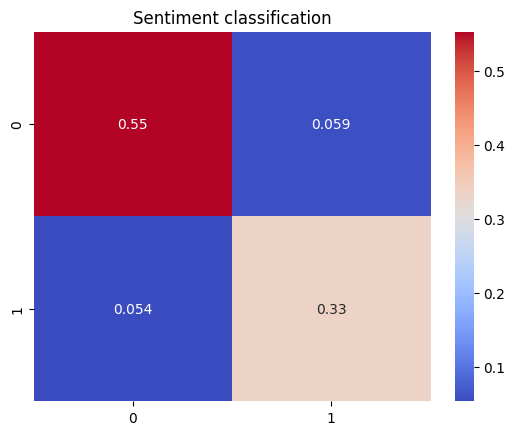

In [54]:

sns.heatmap(confusion_matrix(y_true= labels_flat, y_pred = preds_flat) / len(preds_flat), 
            annot = True, cmap ='coolwarm')
plt.title('Sentiment classification')

In [55]:
import joblib
filename = 'final_model_A.sav'
joblib.dump(model, filename)

['final_model_A.sav']

In [57]:
torch.save(model, "C:/Users/mufdu/Documents/Deep-Learning/SemEval-Task10/Bert-based-uncased/model_A")

In [56]:
# load the model from disk
# loaded_model = joblib.load(filename)
# result = loaded_model.score(X_test, Y_test)